<ipython-input-9-da5466cf40cd>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Binary Classification Accuracy: 94.74%


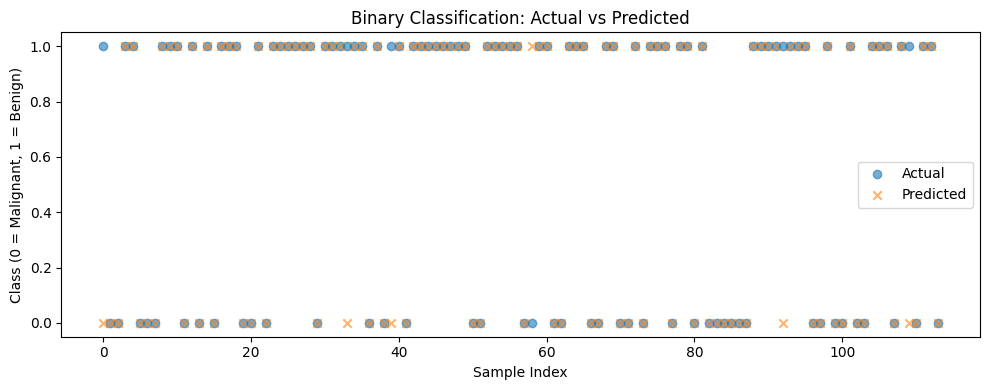

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class BinaryLogisticRegression:
    def __init__(self, lr=0.01, n_iter=2000):
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_model = X.dot(self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            dw = (1 / n_samples) * X.T.dot(y_pred - y)
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return (self.sigmoid(X.dot(self.weights) + self.bias) >= 0.5).astype(int)

# Load dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train and predict
model = BinaryLogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Binary Classification Accuracy: {accuracy*100:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(10, 4))
idx = np.arange(len(y_test))
plt.scatter(idx, y_test, label="Actual", marker='o', alpha=0.6)
plt.scatter(idx, y_pred, label="Predicted", marker='x', alpha=0.6)
plt.title("Binary Classification: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Malignant, 1 = Benign)")
plt.legend()
plt.tight_layout()
plt.show()


Multiclass Classification Accuracy: 100.00%


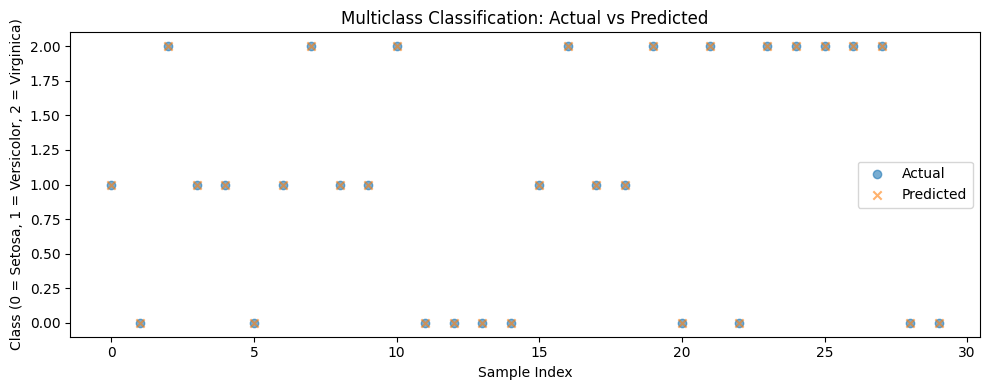

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

class MulticlassLogisticRegression:
    def __init__(self, lr=0.1, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def fit(self, X, y_onehot):
        n_samples, n_features = X.shape
        n_classes = y_onehot.shape[1]
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((1, n_classes))

        for _ in range(self.n_iter):
            Z = X.dot(self.W) + self.b
            P = self.softmax(Z)
            error = P - y_onehot
            dW = (1 / n_samples) * X.T.dot(error)
            db = (1 / n_samples) * np.sum(error, axis=0, keepdims=True)
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        Z = X.dot(self.W) + self.b
        P = self.softmax(Z)
        return np.argmax(P, axis=1)

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))

# Train and predict
model = MulticlassLogisticRegression()
model.fit(X_train, y_train_onehot)
y_pred = model.predict(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Multiclass Classification Accuracy: {accuracy*100:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(10, 4))
idx = np.arange(len(y_test))
plt.scatter(idx, y_test, label="Actual", marker='o', alpha=0.6)
plt.scatter(idx, y_pred, label="Predicted", marker='x', alpha=0.6)
plt.title("Multiclass Classification: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Setosa, 1 = Versicolor, 2 = Virginica)")
plt.legend()
plt.tight_layout()
plt.show()
